### The setup

In [3]:
import requests
import json 
import pandas as pd
from time import sleep

In [4]:
%pwd

'/home/i/Documents/global/evacuation-routes'

In [5]:



 
consumer_key = '81m7Ed67rFO0yYtLQJpw95kGM'


consumer_secret = 'nas6cHtZDnmYwAoEjwA3DEzjyxVhB1YN04tooxkD9Lmot17El1'


access_token = '1081242889609535488-eFvX06XDuOOPjeN6zUe9KcgBbG78eB'

access_token_secret = 'g8V9kqORBJ8lnkAZcCEXkMHepRaFWhAE1yc13eqeFVlhJ'

In [6]:
import tweepy

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

### The cities name and Twitter usernames data frames

In [7]:
from bs4 import BeautifulSoup

Gathering the most flooded cities in the US from the link below. <br /> 
Gathering the traffic Twitter usernames for each of these cities manually. <br />
Putting them together in a data frame for quick retreival. 

In [8]:
flood_url = 'https://www.cheatsheet.com/culture/american-cities-homes-danger-flooding.html/'

In [9]:
flood_content = requests.get(flood_url)

In [10]:
flood_soup = BeautifulSoup(flood_content.content, 'lxml')

In [11]:
cities = []
for h in flood_soup.find_all('h2'):
#     print(h.text.split('.')[1:])
#     print("".join(h.text.split('.')[1:]))
    cities.append("".join(h.text.split('.')[1:]))

In [12]:
# cleaning up the city names and location:
cities.index(' St Augustine')

8

In [13]:
# adding the state to St Augustine
cities[8] = " St Augustine, Florida"

In [14]:
cities = [i.strip() for i in cities]
cities

['Pahrump, Nevada',
 'Jersey City, New Jersey',
 'Plano, Texas',
 'Peachtree Corners, Georgia',
 'Miramar Beach, Florida',
 'Raleigh, North Carolina',
 'Rogers City, Arkansas',
 'Carmel, Indiana',
 'St Augustine, Florida',
 'The Woodlands, Texas',
 'Round Rock, Texas',
 'Denton, Texas',
 'Kissimmee, Florida',
 'San Marcos, Texas',
 'Sugar Land, Texas']

In [15]:
twitter_user_names = [
    ["nevadadot"],
    ["NJDOT_info", "511nyNJ"],
    ["TotalTrafficDFW", "krldtraffic", "NTTATravelAlert", "cityofplanotx"],
    ["PtreeCorners"],
    ["fl511_panhandl"],
    ["TotalTrafficRDU", "NCDOT_Triangle", "NCDOT", "RW911", "NCDOT_I77"],
    ["myARDOT", "traffic_nwa", "myARDOT"],
    ["QCTrafficAlerts", "WIBCTraffic"],
    ["fl511_northeast", "SJSOPIO"],
    ["ih45n_traffic", "KPRC2Traffic", "TownshipTransit"],
    ["roundrock"],
    ["DentonTweets", "ScannerRadioDFW", "DFWscanner"],
    ["fl511_central", "MyNews13Traffic", "fl511_state"],
    ["TxDOT", "TotalTrafficAUS"],
    ["SugarLandtxgov", "houstontranstar", "TotalTrafficHOU"]
    
]

In [16]:
data_f = pd.DataFrame(twitter_user_names).T

In [17]:
data_f.columns = cities
data_f

,"Pahrump, Nevada","Jersey City, New Jersey","Plano, Texas","Peachtree Corners, Georgia","Miramar Beach, Florida","Raleigh, North Carolina","Rogers City, Arkansas","Carmel, Indiana","St Augustine, Florida","The Woodlands, Texas","Round Rock, Texas","Denton, Texas","Kissimmee, Florida","San Marcos, Texas","Sugar Land, Texas"
0,nevadadot,NJDOT_info,TotalTrafficDFW,PtreeCorners,fl511_panhandl,TotalTrafficRDU,myARDOT,QCTrafficAlerts,fl511_northeast,ih45n_traffic,roundrock,DentonTweets,fl511_central,TxDOT,SugarLandtxgov
1,None,511nyNJ,krldtraffic,None,None,NCDOT_Triangle,traffic_nwa,WIBCTraffic,SJSOPIO,KPRC2Traffic,None,ScannerRadioDFW,MyNews13Traffic,TotalTrafficAUS,houstontranstar
2,None,None,NTTATravelAlert,None,None,NCDOT,myARDOT,None,None,TownshipTransit,None,DFWscanner,fl511_state,None,TotalTrafficHOU
3,None,None,cityofplanotx,None,None,RW911,None,None,None,None,None,None,None,None,None
4,None,None,None,None,None,NCDOT_I77,None,None,None,None,None,None,None,None,None


In [20]:
def get_twitter_user_names(city_name, df = data_f): 
    from io import BytesIO
    from PIL import Image
    from urllib import request
    import matplotlib.pyplot as plt
   
    """
    Returns the Twitter user names that you can plug later in the function: traffic, that get twitter updates.
    
    Parameters:
    ----------
    city_name: Enter the city name, state. All small letters, in this format. Example: "round rock, texas".
    df: the dataframe of city names and their traffic Twitter user names. 
    """
    temp_df = data_f
    temp_df.columns = [col.lower() for col in temp_df.columns]
    try: 
        mask = temp_df[city_name].notna()
        #This will grab and diplay a map of the city in which the tweets reference using the mapquest api.
        url = 'https://www.mapquestapi.com/staticmap/v5/map?key=8bdpAE3VNuvTqYz4KgRRXTcwANKHWjnG&center='+city_name.replace(' ','') + '&traffic=flow|cons|inc&banner=' + city_name.replace(' ','').upper()+'_EVAC++++++++++++++++++++++++++ATX+P4&zoom=15&size=800,800'

        buffer = BytesIO(request.urlopen(url).read())
        image = Image.open(buffer)

        # uncomment this to display a larger, higher resolution pop up map
        #image.show()

        #pyplot image
        plt.figure(figsize=(12,12))
        plt.imshow(image)
        plt.show()    
        return list(temp_df.loc[mask, city_name])
    except KeyError: 
        print(f'This City Does Not Have Twitter User Names Yet. Try From This List: {temp_df.columns}')
    
    

In [21]:
# testing the function:
get_twitter_user_names('denton, texas')

<Figure size 1200x1200 with 1 Axes>

['DentonTweets', 'ScannerRadioDFW', 'DFWscanner']

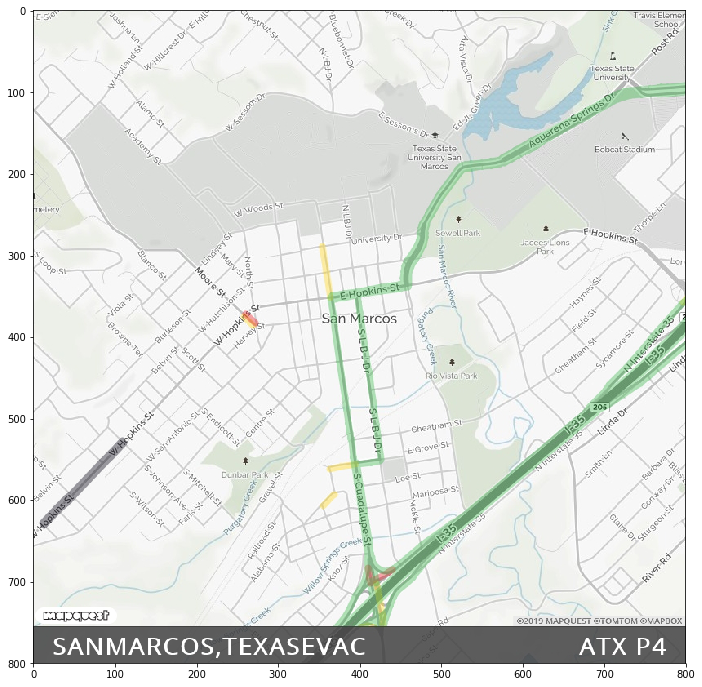

['TxDOT', 'TotalTrafficAUS']

In [22]:
get_twitter_user_names('san marcos, texas')

Next, making a function that will go collect the most recent traffic tweets for us

In [23]:
def gather_tweets(handle:str, n=300):
    """
    Returns the most recent tweets (up to 200), from the selected Twitter username (handle)
    
    Parameters:
    -----------
    handle: name of the Twitter user page
    n: how many tweets you want. can't get more than 200 
    retrieves only recent tweets
    """
    tweets_everything = api.user_timeline(handle, count = n)
    df = pd.DataFrame(columns = ['id', 'tweets', 'date', 'location'])
    
    for i in tweets_everything:
        tweets = i.text
        try: 
            date = i.formatted_date
        except: 
            date = i.created_at
        
        try:
            location = i.geo['coordinates']
        except: 
            try: 
                location = i.coordinates
            except: 
                location = 'NaN'
                
        tweet_id = i.id # by the way, tweet_id is included in the permalink
                
        df.loc[len(df)] = [tweet_id, tweets, date, location] # inside the loop, building the df row by row
        
    return df

The next function is user-interactive:

In [35]:
def traffic(location):
    """
    This function takes as input location in the form of -city, state- then will accept a road or highway name,
    returning the most recent tweets from the traffic data frame.
    Enter street name in all any case you like, upper, lower, mix..
    
    parameters: 
    location: city, state in the format. *currently only from the specified list)
    
    """
    print('WARNING: If no users were passed, it will search Houston, TX traffic by default')
    users = get_twitter_user_names(location)
    if users == []:
        users = ["TotalTrafficHOU", "houstontranstar"]
        print("Empty users list passed; changed to default: Houston, TX traffic")
        
    s = input('What street you want to find? ')
    
    # getting the df, in case there's more than 2 users: 
    lst = []
    for u in users: 
        lst.append(gather_tweets(u))
        
    df = pd.concat(lst, 
              axis = 0, sort = False)
    
    mask = df['tweets'].str.contains(s, case = False) # case = False makes it not case sensitive!
    tweets_15 = df.loc[mask, 'tweets'].values[:15]
    
    return tweets_15
    
    
# the tweets are ordered most recent first by nature; the first 15 tweets are the most recent. 
# since the resutls are not perfect, one will have information about other streets too

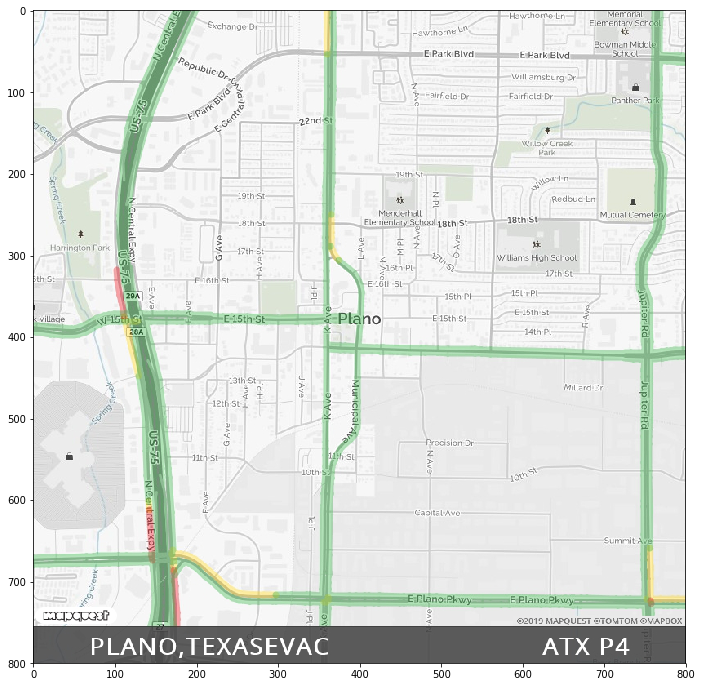

What street you want to find? 75


array(['Accident cleared in #Dallas on 175 WB at Prairie Crk Rd #DFWTraffic https://t.co/4NzBppXRvr',
       'Accident cleared in #Dallas on 75 NB at McCommas Boulevard #DFWTraffic https://t.co/4NzBppXRvr',
       'Accident reported. blocking center and right lanes in #Dallas on 175 WB at Prairie Crk Rd #DFWTraffic https://t.co/4NzBppXRvr',
       'Accident. right shoulder blocked in #Dallas on 75 NB at McCommas Boulevard #DFWTraffic https://t.co/4NzBppXRvr',
       'Accident cleared in #Plano on 75 SB at Legacy Dr #DFWTraffic https://t.co/4NzBppXRvr',
       'Accident cleared in #Richardson on 75 SB at Arapaho Rd #DFWTraffic https://t.co/4NzBppXRvr',
       'Accident cleared in #Plano on 75 SB at Legacy Dr, stop and go traffic back to Bethany Dr, delay of 5 mins… https://t.co/gCXrXNeCHW',
       'Accident. two left lanes blocked in #Plano on 75 SB at Legacy Dr, stop and go traffic back to Bethany Dr, delay of 8 mins #DFWTraffic',
       'Accident reported. blocking right lane in #Rich

In [37]:
#Testing the function
traffic('plano, texas')

In [46]:
# recall that our options for cities are:
[col for col in data_f]

['pahrump, nevada',
 'jersey city, new jersey',
 'plano, texas',
 'peachtree corners, georgia',
 'miramar beach, florida',
 'raleigh, north carolina',
 'rogers city, arkansas',
 'carmel, indiana',
 'st augustine, florida',
 'the woodlands, texas',
 'round rock, texas',
 'denton, texas',
 'kissimmee, florida',
 'san marcos, texas',
 'sugar land, texas']

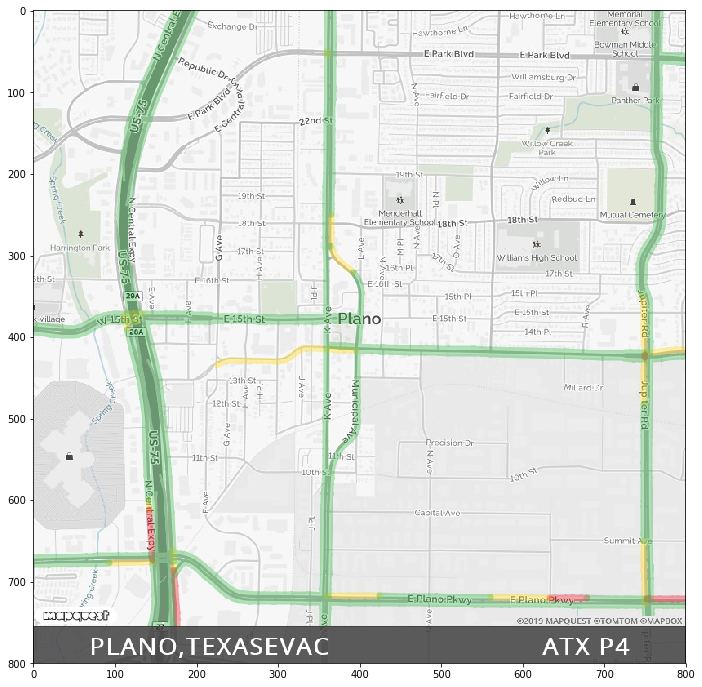

['TotalTrafficDFW', 'krldtraffic', 'NTTATravelAlert', 'cityofplanotx']

In [29]:
get_twitter_user_names('plano, texas')

To use this function from a first responder, call the traffic function and pass is the function that get the Twitter usernames, like this: